# Problema da Mochila


### Solução por Força Bruta

In [49]:
import random
from itertools import combinations
import time
import matplotlib.pyplot as plt

In [41]:
# Quantidade total de items
num_items = 15

In [42]:
# Capacidade da mochila
sack_capacity = 50

In [43]:
# Atribuindo pesos para cada item randomicamente

def generateItems(num_items):
    items = [
        {'weight': random.randint(1,20), 'value': random.randint(10, 100)}
        for _ in range(num_items)
    ]
    return items
    

items = generateItems(num_items)

In [44]:
for i, item in enumerate(items):
    print(f'Item {i + 1}: {item}')

Item 1: {'weight': 11, 'value': 10}
Item 2: {'weight': 7, 'value': 99}
Item 3: {'weight': 3, 'value': 29}
Item 4: {'weight': 19, 'value': 23}
Item 5: {'weight': 16, 'value': 11}
Item 6: {'weight': 14, 'value': 96}
Item 7: {'weight': 4, 'value': 18}
Item 8: {'weight': 13, 'value': 94}
Item 9: {'weight': 3, 'value': 100}
Item 10: {'weight': 6, 'value': 46}
Item 11: {'weight': 11, 'value': 51}
Item 12: {'weight': 4, 'value': 70}
Item 13: {'weight': 18, 'value': 15}
Item 14: {'weight': 20, 'value': 64}
Item 15: {'weight': 4, 'value': 30}


#### Algoritmo de Força Bruta

In [36]:
def knapsack_brute_force(items, capacity):

    start = time.time() # Registra o tempo de execução

    n = len(items)
    best_value = 0
    best_combination = None
    used_capacity = None
    
    for r in range(n + 1): #Quantidade de elementos na combinação
        for combination in combinations(items, r): #Combinação de r itens
            total_weight = sum(item['weight'] for item in combination)
            total_value = sum(item['value'] for item in combination)
            if total_weight <= capacity and total_value > best_value:
                best_value = total_value
                best_combination = combination
                used_capacity = total_weight

    end = time.time() - start # Coleta o tempo de execução

    return best_value, best_combination, used_capacity, end

In [46]:
final_value, final_combination, final_capacity, time = knapsack_brute_force(items, sack_capacity)

print('Combinacao Final:', end=' ')
for item in final_combination:
    index = items.index(item)
    print(index, end=' ')
print(f'\nValor Final: {final_value}\nCapacidade Final: {final_capacity}\nTempo Total: {time:.4f} s')

Combinacao Final: 1 2 5 7 8 9 11 
Valor Final: 534
Capacidade Final: 50
Tempo Total: 0.0506 s


### Introduzindo novos items na mochila

In [38]:
times = []

# 20 Itens 
items = generateItems(20)
*_, final_time = knapsack_brute_force(items, sack_capacity)

times.append(final_time)

# 22 Itens 
items = generateItems(22)
*_, final_time = knapsack_brute_force(items, sack_capacity)

times.append(final_time)

# 24 Itens 
items = generateItems(24)
*_, final_time = knapsack_brute_force(items, sack_capacity)

times.append(final_time)


# 26 Itens 
items = generateItems(26)
*_, final_time = knapsack_brute_force(items, sack_capacity)

times.append(final_time)


# 30 Itens 
items = generateItems(30)
*_, final_time = knapsack_brute_force(items, sack_capacity)

times.append(final_time)


times

[1.4326226711273193,
 5.88180136680603,
 25.755443572998047,
 111.34951567649841,
 2032.8912761211395]

### Plotando os gráficos

In [ ]:
#Inserindo valores de 15 itens
times.insert(0, time)
num_items = [15, 20, 22, 24, 26, 30]

print(times)
print(num_items)

[0.050644874572753906, 1.4326226711273193, 5.88180136680603, 25.755443572998047, 111.34951567649841, 2032.8912761211395]
[15, 20, 22, 24, 26, 30]


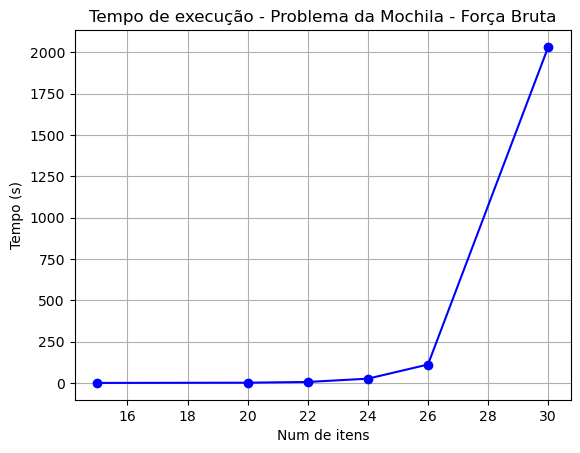

In [52]:
# Função de plotar
plt.plot(num_items, times, marker='o', linestyle='-', color='b', label='Line 1')

#Definindo titulo e legendas
plt.xlabel('Num de itens')
plt.ylabel('Tempo (s)')
plt.title('Tempo de execução - Problema da Mochila - Força Bruta')
plt.grid(True)

## Solução por Algoritmo Genético

Tamanho da população: 100
Forma de Seleção: Rank Selection + Wheel 

In [72]:
# Parametros iniciais
NUM_ITEMS = 15
POP_SIZE = 100
CAPACITY = 50

In [73]:
items = generateItems(NUM_ITEMS)

In [74]:
for i, item in enumerate(items):
    print(f'Item {i + 1}: {item}')

Item 1: {'weight': 12, 'value': 63}
Item 2: {'weight': 4, 'value': 91}
Item 3: {'weight': 18, 'value': 60}
Item 4: {'weight': 15, 'value': 44}
Item 5: {'weight': 13, 'value': 12}
Item 6: {'weight': 1, 'value': 11}
Item 7: {'weight': 4, 'value': 25}
Item 8: {'weight': 6, 'value': 57}
Item 9: {'weight': 11, 'value': 47}
Item 10: {'weight': 3, 'value': 38}
Item 11: {'weight': 9, 'value': 25}
Item 12: {'weight': 13, 'value': 24}
Item 13: {'weight': 7, 'value': 29}
Item 14: {'weight': 13, 'value': 12}
Item 15: {'weight': 12, 'value': 10}


In [75]:
# Definição da população inicial (binaria)

def generateIndividual():
    return [random.randint(0, 1) for _ in range(NUM_ITEMS)]

# Inicialização da população
def generatePopulation():
    return [generateIndividual() for _ in range(POP_SIZE)]

In [76]:
population = generatePopulation()

population

[[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
 [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1],
 [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
 [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1],
 [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,

### Avalição de cada indivíduo

In [77]:
#Função de avaliação (fitness)

def fitness(individual):
    total_weight = total_value = 0
    #Percorre o cromossomo do indivíduo
    for gene, item in zip(individual, items):
        #Se o bit for igual a 1, o item será incluído na mochila
        if gene:
            #Calcula o peso e o valor
            total_weight += item['weight']
            total_value += item['value'] 
        # Se excedeu a capacidade máxima
        if total_weight > CAPACITY:
            return 0 # Penalização
    #Quanto maior o valor, melhor o fitness
    return total_value

In [78]:
# Salva o cada individuo com seu valor fitness associado em uma tupla
evaluated_population = [(individual, fitness(individual)) for individual in population]

evaluated_population

[([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0], 188),
 ([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1], 0),
 ([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0], 0),
 ([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1], 0),
 ([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], 0),
 ([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], 0),
 ([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0], 0),
 ([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], 0),
 ([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], 0),
 ([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], 0),
 ([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0], 208),
 ([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1], 0),
 ([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], 0),
 ([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 0),
 ([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1], 0),
 ([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1], 0),
 ([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], 0),
 ([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], 0),
 ([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 

### Seleção dos indivíduos


In [ ]:
# Função de rankeamento 

def rankAssigment(evaluated_population):
    # Ordena a população por ordem cresente de fitness
    evaluated_population = sorted(evaluated_population, key=lambda x: x[1],)

    # Atribui o valor de ranking para cada individu0
    # Sendo menor_fitness = 0 e maior_fitness = POP_SIZE
    ranked_population  = [(ind[0], ind[1], rank)for rank , ind in enumerate(evaluated_population)]

    return ranked_population


In [ ]:
# Função de seleção

def rankSelection(ranked_population):
    offset = random.random()
    sum = 0

     # Cria a fatia POP_SIZE(POP_SIZE + 1)/2
    population_size = len(ranked_population) 
    slice = (population_size*(population_size + 1))/2

    for individual in ranked_population:
        sum += (individual[2] + 1)/slice #
        if sum >= offset:
            return individual